<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jihidalgor/blob/main/A01794221_ActividadSemanal6_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC4029 - Ciencia y analítica de datos.**

**Actividad Semanal 6 - Visualización.**


Alumno: Jorge Iván Hidalgo Reyes.

*Matrícula: A01794221.*


Profesora: María de la Paz Rico Fernández.

Fecha: Noviembre 01, 2022.

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Información del conjunto de datos:**

Esta investigación se centra en el caso de los impagos de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de impago entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la exactitud predictiva de la probabilidad de impago estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles.


# **Punto 1.** 

Descarga los datos y carga el dataset en tu librería.

*Información del conjunto de datos:*

Esta investigación se centra en el caso de los impagos de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de impago entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la exactitud predictiva de la probabilidad de impago estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles.

*Descripción de los atributos (columnas):*

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. *We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above*. 
* X12-X17: *Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005*. 
* X18-X23: *Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005*. 

*Referencia.*

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [181]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
dataSet_Original = pd.read_csv(url)
dataSet_Original.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [182]:
dataSet_Original.drop(['ID'], axis=1, inplace=True)
dataSet_Original

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


El siguiente paso es cambiar el nombre de las columnas de la siguiente manera:

* X1 = Amount of credit.
* X2 = Gender.
* X3 = Education.
* X4 = Marital status.
* X5 = Age.
* X6 a X11 = History of Past Payment (HoPP_Month).
* X12 a X17 = Amount of bill statement (AoBS_Month).
* X18 a X23 = Amount of previous payment (AoPP_Month).

In [183]:
dataSet_Original.columns = ['Amount_credit', 'Gender', 'Education', 'Marital_status', 'Age', 
                            'HoPP_Sep', 'HoPP_Ago', 'HoPP_Jul', 'HoPP_Jun', 'HoPP_May', 'HoPP_Abr',
                            'AoBS_Sep', 'AoBS_Ago', 'AoBS_Jul', 'AoBS_Jun', 'AoBS_May', 'AoBS_Abr',
                            'AoPP_Sep', 'AoPP_Ago', 'AoPP_Jul', 'AoPP_Jun', 'AoPP_May', 'AoPP_Abr',
                            'Y']
dataSet_Original.head()

,Amount_credit,Gender,Education,Marital_status,Age,HoPP_Sep,HoPP_Ago,HoPP_Jul,HoPP_Jun,HoPP_May,...,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# **Punto 2.** 

Obten la información del DataFrame con los métodos y propiedades: 

* shape.
* columns 
* head(). 
* dtypes.
* info(). 
* isna().

In [184]:
dataSet_Original.shape

(30000, 24)

In [185]:
dataSet_Original.columns

Index(['Amount_credit', 'Gender', 'Education', 'Marital_status', 'Age',
       'HoPP_Sep', 'HoPP_Ago', 'HoPP_Jul', 'HoPP_Jun', 'HoPP_May', 'HoPP_Abr',
       'AoBS_Sep', 'AoBS_Ago', 'AoBS_Jul', 'AoBS_Jun', 'AoBS_May', 'AoBS_Abr',
       'AoPP_Sep', 'AoPP_Ago', 'AoPP_Jul', 'AoPP_Jun', 'AoPP_May', 'AoPP_Abr',
       'Y'],
      dtype='object')

In [186]:
dataSet_Original.head()

,Amount_credit,Gender,Education,Marital_status,Age,HoPP_Sep,HoPP_Ago,HoPP_Jul,HoPP_Jun,HoPP_May,...,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [187]:
dataSet_Original.dtypes

Amount_credit       int64
Gender            float64
Education         float64
Marital_status    float64
Age               float64
HoPP_Sep          float64
HoPP_Ago          float64
HoPP_Jul          float64
HoPP_Jun          float64
HoPP_May          float64
HoPP_Abr          float64
AoBS_Sep          float64
AoBS_Ago          float64
AoBS_Jul          float64
AoBS_Jun          float64
AoBS_May          float64
AoBS_Abr          float64
AoPP_Sep          float64
AoPP_Ago          float64
AoPP_Jul          float64
AoPP_Jun          float64
AoPP_May          float64
AoPP_Abr          float64
Y                 float64
dtype: object

In [188]:
dataSet_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amount_credit   30000 non-null  int64  
 1   Gender          29999 non-null  float64
 2   Education       29998 non-null  float64
 3   Marital_status  29998 non-null  float64
 4   Age             29995 non-null  float64
 5   HoPP_Sep        29997 non-null  float64
 6   HoPP_Ago        29995 non-null  float64
 7   HoPP_Jul        29993 non-null  float64
 8   HoPP_Jun        29991 non-null  float64
 9   HoPP_May        29984 non-null  float64
 10  HoPP_Abr        29986 non-null  float64
 11  AoBS_Sep        29989 non-null  float64
 12  AoBS_Ago        29989 non-null  float64
 13  AoBS_Jul        29987 non-null  float64
 14  AoBS_Jun        29985 non-null  float64
 15  AoBS_May        29983 non-null  float64
 16  AoBS_Abr        29990 non-null  float64
 17  AoPP_Sep        29992 non-null 

In [189]:
dataSet_Original.isna().sum()

Amount_credit      0
Gender             1
Education          2
Marital_status     2
Age                5
HoPP_Sep           3
HoPP_Ago           5
HoPP_Jul           7
HoPP_Jun           9
HoPP_May          16
HoPP_Abr          14
AoBS_Sep          11
AoBS_Ago          11
AoBS_Jul          13
AoBS_Jun          15
AoBS_May          17
AoBS_Abr          10
AoPP_Sep           8
AoPP_Ago           9
AoPP_Jul           8
AoPP_Jun          11
AoPP_May          11
AoPP_Abr           5
Y                  3
dtype: int64

# **Punto 3.**

Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

* *Caso 1 - Eliminando registros nulos.*

¿Existen datos nulos en el conjunto de datos?

In [190]:
df = dataSet_Original.copy()
df.isnull().values.any()

True

¿Cuántos datos nulos son en total?

In [191]:
df.isnull().sum().sum()

196

Ahora vamos a determinar la cantidad de registros(filas) que representan esos 196 datos nulos.

In [192]:
filas_nulas = df[df.isnull().any(axis=1)].shape[0]
filas_nulas

42

De los 30000 registros (filas) que tiene nuestro conjunto de datos, sólo 42 de ellos presentan un dato nulo. Esto representa sólo el 0.14 % de nuestro conjunto de datos original.

Por lo tanto, procedemos a eliminar dichas filas.

In [193]:
df.dropna(inplace=True)
df.isna().values.any()

False

Revisamos la dimensión de nuestro conjunto de datos sin datos nulos.

In [194]:
df.shape

(29958, 24)

* Caso 2 - Imputación.

Primero separamos las variables númericas de las categóricas de nuestro conjunto de datos original.

In [195]:
df_imp = dataSet_Original.copy()

In [196]:
mi_list_cat = list(df_imp.iloc[:,1:11])
mi_list_cat.remove('Age')

df_imp_cat = df_imp[mi_list_cat]
df_imp_cat.head()

,Gender,Education,Marital_status,HoPP_Sep,HoPP_Ago,HoPP_Jul,HoPP_Jun,HoPP_May,HoPP_Abr
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [197]:
df_imp_num = df_imp.drop(df_imp_cat.columns, axis = 1)
df_imp_num.drop(axis = 1, columns = 'Y',inplace = True)
df_imp_num.head(5)

,Amount_credit,Age,AoBS_Sep,AoBS_Ago,AoBS_Jul,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [198]:
lista_categoricas = df_imp_cat.columns
print(lista_categoricas)
print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
lista_numericas   = df_imp_num.columns
print(lista_numericas)

Index(['Gender', 'Education', 'Marital_status', 'HoPP_Sep', 'HoPP_Ago',
       'HoPP_Jul', 'HoPP_Jun', 'HoPP_May', 'HoPP_Abr'],
      dtype='object')
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Index(['Amount_credit', 'Age', 'AoBS_Sep', 'AoBS_Ago', 'AoBS_Jul', 'AoBS_Jun',
       'AoBS_May', 'AoBS_Abr', 'AoPP_Sep', 'AoPP_Ago', 'AoPP_Jul', 'AoPP_Jun',
       'AoPP_May', 'AoPP_Abr'],
      dtype='object')


In [199]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categoricas_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent'))])

numericas_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median'))])

In [200]:
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(transformers = [('cate', categoricas_pipeline, lista_categoricas),
                                                    ('nume', numericas_pipeline, lista_numericas)],                                                    
                                                    remainder = 'passthrough')

In [201]:
lista_nombre_col = [*lista_categoricas, *lista_numericas, 'Y']
lista_nombre_col

['Gender',
 'Education',
 'Marital_status',
 'HoPP_Sep',
 'HoPP_Ago',
 'HoPP_Jul',
 'HoPP_Jun',
 'HoPP_May',
 'HoPP_Abr',
 'Amount_credit',
 'Age',
 'AoBS_Sep',
 'AoBS_Ago',
 'AoBS_Jul',
 'AoBS_Jun',
 'AoBS_May',
 'AoBS_Abr',
 'AoPP_Sep',
 'AoPP_Ago',
 'AoPP_Jul',
 'AoPP_Jun',
 'AoPP_May',
 'AoPP_Abr',
 'Y']

In [202]:
df_imp = pd.DataFrame(col_transformer.fit_transform(df_imp), columns = lista_nombre_col)

In [203]:
df_imp.head()

,Gender,Education,Marital_status,HoPP_Sep,HoPP_Ago,HoPP_Jul,HoPP_Jun,HoPP_May,HoPP_Abr,Amount_credit,...,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr,Y
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,20000.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,120000.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,50000.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [204]:
df_imp.isna().values.any()

True

In [205]:
df_imp.isna().sum()

Gender            0
Education         0
Marital_status    0
HoPP_Sep          0
HoPP_Ago          0
HoPP_Jul          0
HoPP_Jun          0
HoPP_May          0
HoPP_Abr          0
Amount_credit     0
Age               0
AoBS_Sep          0
AoBS_Ago          0
AoBS_Jul          0
AoBS_Jun          0
AoBS_May          0
AoBS_Abr          0
AoPP_Sep          0
AoPP_Ago          0
AoPP_Jul          0
AoPP_Jun          0
AoPP_May          0
AoPP_Abr          0
Y                 3
dtype: int64

In [206]:
df_imp.dropna(inplace=True)

In [207]:
df_imp.isna().values.any()

False

# **Punto 4.**

Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

*Caso 1 - Conjunto de datos sin imputación y que solamente se eliminaron los registros nulos.*



In [208]:
df.describe()

,Amount_credit,Gender,Education,Marital_status,Age,HoPP_Sep,HoPP_Ago,HoPP_Jul,HoPP_Jun,HoPP_May,...,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


*Caso 2 - Conjunto de datos con imputación en las variables de entrada y eliminación de registros nulos en la variable de salida*

In [209]:
df_imp.describe()

,Gender,Education,Marital_status,HoPP_Sep,HoPP_Ago,HoPP_Jul,HoPP_Jun,HoPP_May,HoPP_Abr,Amount_credit,...,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr,Y
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,...,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000
mean,1.603794,1.853085,1.551955,-0.016768,-0.133813,-0.166517,-0.220822,-0.266293,-0.291096,167496.072274,...,43265.961896,40314.124779,38876.048538,5662.352002,5.921706e+03,5225.052405,4826.365170,4799.417042,5216.012201,0.221189
std,0.489116,0.790317,0.521963,1.123708,1.197088,1.195840,1.168970,1.132990,1.149861,129748.803871,...,64334.451680,60797.686272,59555.293718,16562.848369,2.304194e+04,17607.010539,15666.756595,15278.899254,17778.281538,0.415054
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,10000.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,50000.000000,...,2332.000000,1768.000000,1257.000000,1000.000000,8.360000e+02,390.000000,298.000000,254.000000,118.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140000.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240000.000000,...,54515.000000,50180.000000,49205.000000,5006.000000,5.000000e+03,4505.000000,4013.000000,4031.000000,4000.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1000000.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Explicación las medidas de tendencia central y dispersión:

* En la variable "Education" se puede observar que tenemos un valor atípico en los datos de dicha columna, ya que en los resultados de la función describe() nos menciona que el máximo es un 6 y en la información/descripción de los datos se menciona que esta variable tiene cuatro niveles o categorías (1, 2, 3 y 4) que corresponden a "graduate school", "university", "high school" y "others".

* En la variable "Marital_status" se puede observar que también tiene se tiene un valor atípico en los datos de dicha columna, ya que en los resultados de las medidas de dispersión y tendencia central nos menciona que el mínimo es un 0 y en la información/descripción de los datos se menciona que esta variable tiene únicamente tres niveles o categorías (1, 2, 3) que corresponde a "married", "single" y "others".

* En las variables "History of past payment", abreviado como "HoPP" para los meses de Abril a Septiembre se puede observar que también tienen un valor atípico en los datos de dicha columna, ya que en los resultados que nos entrega la función describe() nos dice que el mínimo es un -2 y en la información/descripción de los datos se menciona que esta variable comienza con un nivel o categoría de -1, luego 1, 2, y así sucesivamente. 


# **Paso 5.**

Realiza el conteo de las variables categóricas.

In [210]:
lista_categoricas

Index(['Gender', 'Education', 'Marital_status', 'HoPP_Sep', 'HoPP_Ago',
       'HoPP_Jul', 'HoPP_Jun', 'HoPP_May', 'HoPP_Abr'],
      dtype='object')

In [211]:
print("Gender value_counts: " + str(df_imp['Gender'].value_counts()))
print('--------------------------------------------------------------')
print("Education value_counts: " + str(df_imp['Education'].value_counts()))
print('--------------------------------------------------------------')
print("Marital_status value_counts: "+ str(df_imp['Marital_status'].value_counts()))
print('--------------------------------------------------------------')
print("History of Past Payment : "+ str(df_imp['HoPP_Sep'].value_counts()))
print('--------------------------------------------------------------')
print("History of Past Payment : "+ str(df_imp['HoPP_Ago'].value_counts()))
print('--------------------------------------------------------------')
print("History of Past Payment : "+ str(df_imp['HoPP_Jul'].value_counts()))
print('--------------------------------------------------------------')
print("History of Past Payment : "+ str(df_imp['HoPP_Jun'].value_counts()))
print('--------------------------------------------------------------')
print("History of Past Payment : "+ str(df_imp['HoPP_May'].value_counts()))
print('--------------------------------------------------------------')
print("History of Past Payment : "+ str(df_imp['HoPP_Abr'].value_counts()))

Gender value_counts: 2.0    18112
1.0    11885
Name: Gender, dtype: int64
--------------------------------------------------------------
Education value_counts: 2.0    14030
1.0    10584
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: Education, dtype: int64
--------------------------------------------------------------
Marital_status value_counts: 2.0    15965
1.0    13655
3.0      323
0.0       54
Name: Marital_status, dtype: int64
--------------------------------------------------------------
History of Past Payment :  0.0    14738
-1.0     5684
 1.0     3688
-2.0     2759
 2.0     2665
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: HoPP_Sep, dtype: int64
--------------------------------------------------------------
History of Past Payment :  0.0    15732
-1.0     6047
 2.0     3925
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: HoPP_Ago, dtype: i

# **Paso 6.**

Escala los datos, si consideras necesario.

In [212]:
dfconimp_pca = df_imp.copy()
dfsinimp_pca = df.copy()

Dejamos sólo las columnas numéricas en ambos conjuntos de datos (sin y con imputación).

In [213]:
dfconimp_pca.drop(columns = lista_categoricas, inplace=True)
dfconimp_pca.drop(columns ='Y',inplace=True)

dfsinimp_pca.drop(columns = lista_categoricas, inplace=True)
dfsinimp_pca.drop(columns ='Y',inplace=True)

Estandarizamos para poder realizar PCA.

In [214]:
mi_scaler = StandardScaler() 
scaled_imp = mi_scaler.fit_transform(dfconimp_pca) 
scaled_sna = mi_scaler.fit_transform(dfsinimp_pca)

In [215]:
scaled_dfconimp = pd.DataFrame(scaled_imp, columns=dfconimp_pca.columns)
scaled_dfsinimp = pd.DataFrame(scaled_sna, columns=dfsinimp_pca.columns)

In [216]:
scaled_dfconimp.head()

,Amount_credit,Age,AoBS_Sep,AoBS_Ago,AoBS_Jul,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr
0,-1.136801,-1.245888,-0.642561,-0.647432,-0.668024,-0.672527,-0.663098,-0.652783,-0.341876,-0.227099,-0.296765,-0.308069,-0.314126,-0.293397
1,-0.366068,-1.028903,-0.659279,-0.666779,-0.639285,-0.621667,-0.606269,-0.598026,-0.341876,-0.213601,-0.239968,-0.244239,-0.314126,-0.180899
2,-0.597288,-0.160961,-0.298625,-0.493936,-0.482443,-0.449766,-0.417229,-0.391694,-0.250224,-0.191901,-0.239968,-0.244239,-0.248675,-0.012151
3,-0.905581,0.164517,-0.057561,-0.013342,0.032799,-0.232414,-0.186772,-0.156648,-0.221122,-0.169377,-0.228609,-0.237856,-0.244159,-0.237148
4,-0.905581,2.334370,-0.578679,-0.611352,-0.161231,-0.347035,-0.348179,-0.331547,-0.221122,1.334949,0.271200,0.266405,-0.269030,-0.255204


In [217]:
scaled_dfsinimp.head()

,Amount_credit,Age,AoBS_Sep,AoBS_Ago,AoBS_Jul,AoBS_Jun,AoBS_May,AoBS_Abr,AoPP_Sep,AoPP_Ago,AoPP_Jul,AoPP_Jun,AoPP_May,AoPP_Abr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


# **Paso 7.**

Reduce las dimensiones con PCA, si consideras necesario.

* Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%.

* Indica la importancia de las variables en cada componente.

In [218]:
mi_PCs_conimp = PCA()
mi_PCs_sinimp = PCA()

In [219]:
PCconimp = mi_PCs_conimp.fit_transform(scaled_dfconimp)
PCsinimp = mi_PCs_sinimp.fit_transform(scaled_dfsinimp)

In [220]:
PCs_labels = [f'PC{i + 1}' for i in range(len(scaled_dfconimp.columns))] 

In [221]:
PCs_Resumen_dfconimp = pd.DataFrame({'Desviación estándar': np.sqrt(mi_PCs_conimp.explained_variance_),
                                     'Proporción de varianza': mi_PCs_conimp.explained_variance_ratio_,
                                     'Proporción Acumulada': np.cumsum(mi_PCs_conimp.explained_variance_ratio_)
                                    })

PCs_Resumen_dfconimp = PCs_Resumen_dfconimp.T
PCs_Resumen_dfconimp.columns = PCs_labels
PCs_Resumen_dfconimp.round(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.43297,1.31002,1.02234,0.96174,0.94003,0.93418,0.88293,0.85241,0.84096,0.51423,0.26649,0.20267,0.15924,0.15245
Proporción de varianza,0.42280,0.12258,0.07465,0.06607,0.06312,0.06233,0.05568,0.05190,0.05051,0.01889,0.00507,0.00293,0.00181,0.00166
Proporción Acumulada,0.42280,0.54538,0.62003,0.68609,0.74921,0.81154,0.86722,0.91912,0.96964,0.98852,0.99359,0.99653,0.99834,1.00000


Para tomar los componentes principales, tomamos como base el 70% de los que expliquen mejor la información según las instrucciones de la actividad.Analizando el resultado, podemos observar que del componente PC1 al PC5 encontramos más del 74.92% de la variación se ve reflejada en esos primeros 5 componentes.

Nota: *conjunto de datos sin imputación y sólo eliminación de registros nulos.*


In [222]:
PCs_Resumen_dfsinimp = pd.DataFrame({'Desviación estándar': np.sqrt(mi_PCs_sinimp.explained_variance_),
                                     'Proporción de varianza': mi_PCs_sinimp.explained_variance_ratio_,
                                     'Proporción Acumulada': np.cumsum(mi_PCs_sinimp.explained_variance_ratio_)
                                    })

PCs_Resumen_dfsinimp = PCs_Resumen_dfsinimp.T
PCs_Resumen_dfsinimp.columns = PCs_labels
PCs_Resumen_dfsinimp.round(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.43292,1.30988,1.02227,0.96188,0.94009,0.93424,0.88298,0.85244,0.84104,0.51425,0.26647,0.20264,0.15918,0.15246
Proporción de varianza,0.42278,0.12255,0.07464,0.06608,0.06312,0.06234,0.05569,0.05190,0.05052,0.01889,0.00507,0.00293,0.00181,0.00166
Proporción Acumulada,0.42278,0.54533,0.61997,0.68606,0.74918,0.81152,0.86721,0.91911,0.96964,0.98853,0.99360,0.99653,0.99834,1.00000


Para tomar los componentes principales, tomamos como base el 70% de los que expliquen mejor la información según las instrucciones de la actividad.Analizando el resultado, podemos observar que del componente PC1 al PC5 encontramos más del 74.918% de la variación se ve reflejada en esos primeros 5 componentes.

Nota: *conjunto de datos con imputación*.


In [223]:
total_var = scaled_dfconimp.var().sum()
pd.DataFrame({'Porcentaje Varianza': (scaled_dfconimp.var()/ total_var) * 100,
              'Porcentaje Varianza Acumulado': (scaled_dfconimp.var().cumsum() / total_var) *100
             })

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Amount_credit,7.142857,7.142857
Age,7.142857,14.285714
AoBS_Sep,7.142857,21.428571
AoBS_Ago,7.142857,28.571429
AoBS_Jul,7.142857,35.714286
AoBS_Jun,7.142857,42.857143
AoBS_May,7.142857,50.000000
AoBS_Abr,7.142857,57.142857
AoPP_Sep,7.142857,64.285714
AoPP_Ago,7.142857,71.428571


In [224]:
PCs_Resumen_dfconimp = pd.DataFrame({'% varianza explicada': np.round(mi_PCs_conimp.explained_variance_ratio_,4) * 100,
                                  '% varianza acumulada': np.cumsum(mi_PCs_conimp.explained_variance_ratio_) * 100
                                 }, index = PCs_labels)
PCs_Resumen_dfconimp

,% varianza explicada,% varianza acumulada
PC1,42.28,42.279613
PC2,12.26,54.537525
PC3,7.47,62.002910
PC4,6.61,68.609432
PC5,6.31,74.920995
PC6,6.23,81.154272
PC7,5.57,86.722351
PC8,5.19,91.912227
PC9,5.05,96.963529
PC10,1.89,98.852246


In [225]:
PCs_Resumen_dfsinimp = pd.DataFrame({'% varianza explicada': np.round(mi_PCs_sinimp.explained_variance_ratio_,4) * 100,
                                     '% varianza acumulada': np.cumsum(mi_PCs_sinimp.explained_variance_ratio_) * 100
                                    }, index = PCs_labels)
PCs_Resumen_dfsinimp

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [226]:
PCA_Components_dfconimp = pd.DataFrame(mi_PCs_conimp.components_.round(4),
                                       columns=PCs_labels,
                                       index=scaled_dfconimp.columns 
                                      ).abs()
PCA_Components_dfconimp =PCA_Components_dfconimp.iloc[:,:5]
PCA_Components_dfconimp

,PC1,PC2,PC3,PC4,PC5
Amount_credit,0.1655,0.0327,0.3724,0.3832,0.3883
Age,0.3008,0.0719,0.1909,0.1747,0.1269
AoBS_Sep,0.3788,0.8696,0.0343,0.0019,0.0347
AoBS_Ago,0.2002,0.3384,0.0640,0.0074,0.0605
AoBS_Jul,0.0347,0.0390,0.0412,0.0831,0.1142
AoBS_Jun,0.0782,0.0713,0.0441,0.0290,0.0988
AoBS_May,0.1109,0.0786,0.0082,0.0323,0.1213
AoBS_Abr,0.0481,0.0281,0.0094,0.1357,0.0929
AoPP_Sep,0.8219,0.3309,0.0103,0.0172,0.0187
AoPP_Ago,0.0291,0.0091,0.5668,0.3868,0.1228


In [227]:
PCA_Components_dfconimp.abs().idxmax()

PC1    AoPP_Sep
PC2    AoBS_Sep
PC3    AoPP_Ago
PC4    AoPP_Abr
PC5    AoPP_Abr
dtype: object

In [228]:
PCA_Components_dfconimp.abs().idxmin()

PC1    AoPP_May
PC2    AoPP_Jul
PC3    AoBS_May
PC4    AoBS_Sep
PC5    AoPP_Sep
dtype: object

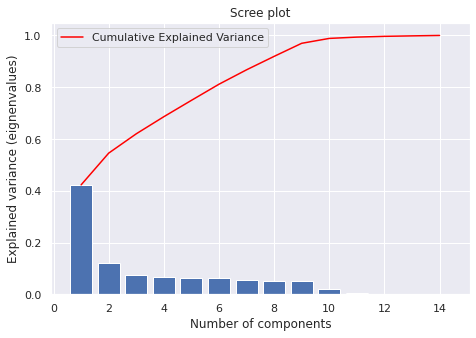

In [229]:
sns.set()

f, ax = plt.subplots(figsize = (7.5,5)) 
# Bar plot of explained_variance
plt.bar(
    range(1,len(mi_PCs_conimp.explained_variance_ratio_)+1),
    mi_PCs_conimp.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(mi_PCs_conimp.explained_variance_ratio_ )+1),
    np.cumsum(mi_PCs_conimp.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()


* Analizando los resultados del ejercicio, como equipos observamos que los primeros siete componentes (PC1 a PC5) comprenden el 74.918% de la variación de los datos.

* La variación de los datos que representan estos componentes es la siguiente: PC1 el 42.278%, PC2 el 12.255%, PC3 el 7.465%, PC4 el 6.608% y PC5 el 6.312%.

* La pérdida de información que se tienen en nuestro conjunto de datos después de realizar PCA es alrededor de un 25.082% (100% - 74.918%).

* Por otra parte, con respecto al máximo y el mínimo de cada componente principal en términos de las variables originales en términos de la importancia se tiene lo siguiente: PC1 (la variable AoPP_May menor y la variable AoPP_Sep mayor), PC2 (la variable AoPP_Jul menor y la variable AoBS_Sep mayor), PC3 (la variable AoBS_May menor y la variable AoPP_Ago mayor), PC4 (la variable AoBS_Sep menor y la variable AoPP_Abr mayor) y PC5 (la variable AoPP_Sep menor y la variable AoPP_Abr mayor).

# **Sección 8.**

Elabora los histogramas de los atributos para visualizar su distribución.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae71d829d0>,
      dtype=object)

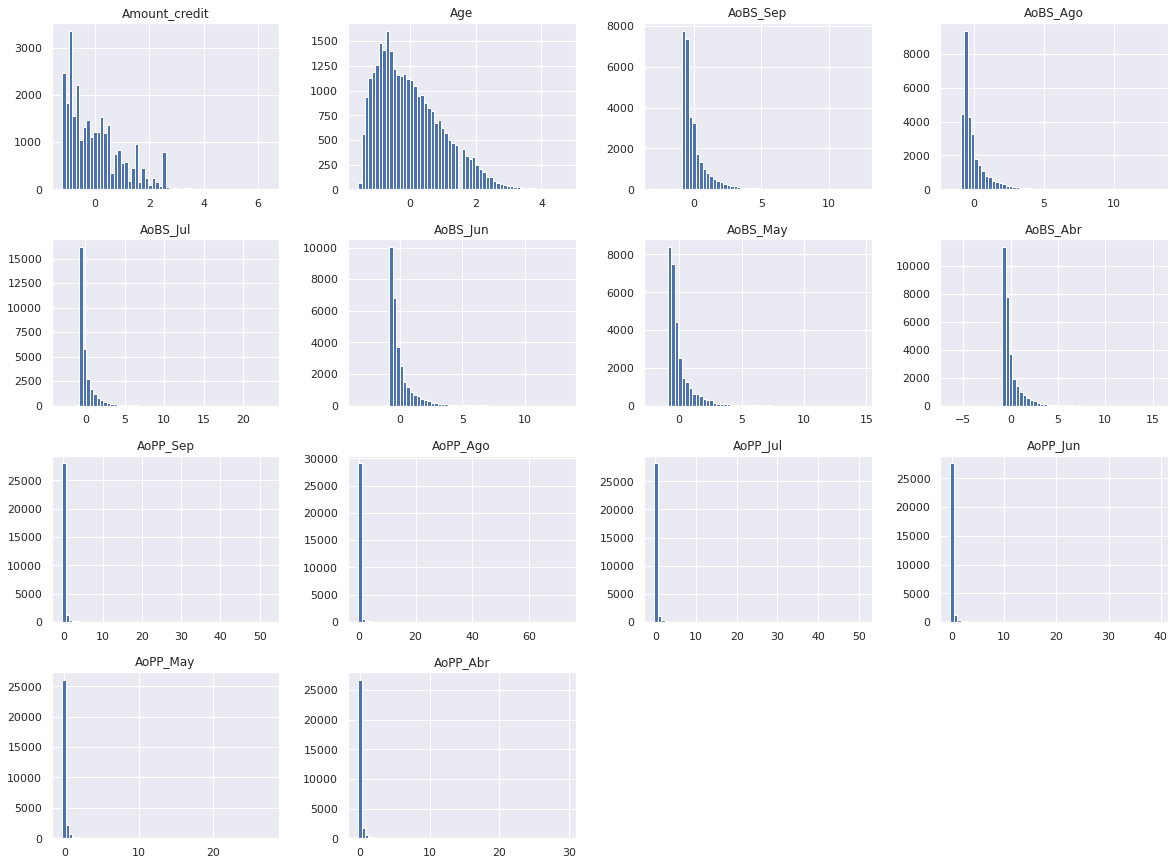

In [230]:
scaled_dfconimp.hist(bins = 60, figsize=(20,15))

# **Sección 9.**

Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, **etc**.

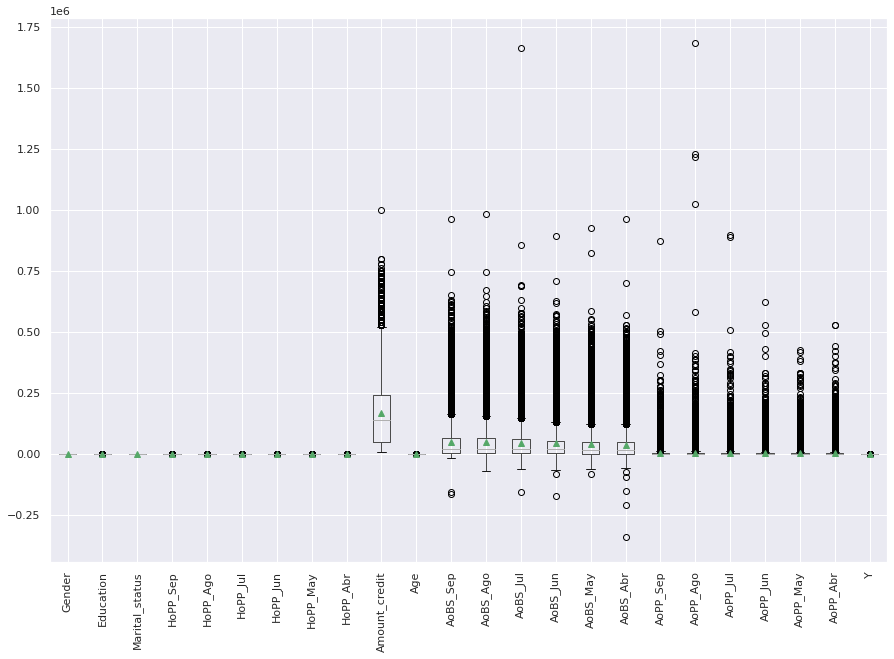

In [231]:
val_atp = df_imp.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.xticks(rotation=90)

plt.show()

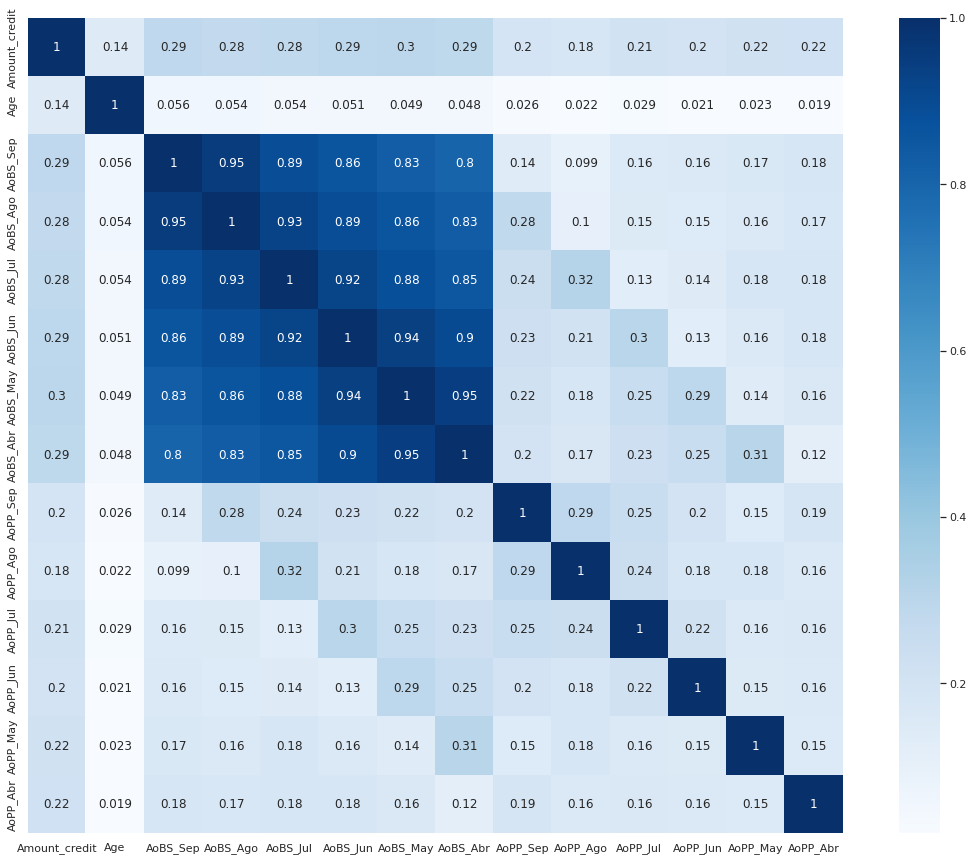

In [232]:
micorr_mat = scaled_dfconimp.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) 
sns.heatmap(micorr_mat, square = True, annot = True, cmap='Blues')

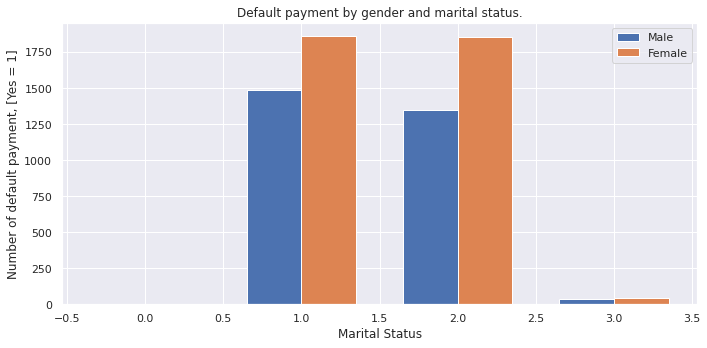

In [238]:
df_g1 = df_imp[['Marital_status', 'Gender', 'Y']]
b = df_g1[(df_g1['Y'] == 1) & (df_g1['Gender']==1)]['Marital_status']
c = df_g1[(df_g1['Y'] == 1) & (df_g1['Gender']==2)]['Marital_status']

import matplotlib.pyplot as plt
import numpy as np

labels = ['0', '1', '2', '3']
male_Y1 = [2, 1485, 1345, 40]
female_Y1 = [3, 1860, 1856, 44]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, male_Y1, width, label='Male')
rects2 = ax.bar(x + width/2, female_Y1, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of default payment, [Yes = 1]')
ax.set_xlabel('Marital Status')
ax.set_title('Default payment by gender and marital status.')
#ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

# **Sección 10.**

Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

* Boxplot: Con este gráfico podemos visualizar que el conjunto de datos cuenta con muchos valores atípicos en la mayoría de los atributos o registros. De hecho, los únicos atributos que no tienen valores atípicos son "Gender" y "Marital_status". Por otra parte, los atributos que tienen los valores atípicos más grandes son AoBS_Jul (Amount of bill statement del mes de Julio) y AoPP_Ago (Amount of previous payment del mes de Agosto).

* Heatmap: Con respecto a este gráfico podemos visualizar la correlación que existe entre los atributos o registros de nuestro conjunto de datos. Se pude visualizar que las variables que presentan mayor correlación entre sí son las que tienen que ver con "Amount of bill statement" de los meses de Abril a Septiembre. También se puede notar que los valores rodan entre 0.8 y 0.95 de correlación.

* Bar chart: Con este gráfico podemos observar la relación que existe entre los atributos o registros "Marital_status", "Gender" y la salida de nuestro conjunto de datos "Y - Default payment [Yes=1]". El género femenino es el que mayor número de "Default paymet" fueron aprobados tanto para el "Marital status: Married (1) y Single (2)" en comparación con el género masculino.  
